In [2]:
import os

import numpy as np
import h5py as h5

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import ion_plot_definitions as ipd

import plotting_tools as pt 

import seaborn as sns
sns.set_style("ticks",{'axes.grid': True, "ytick.major.size": 0.1,
                "ytick.minor.size": 0.05,
                'grid.linestyle': '--'
            })

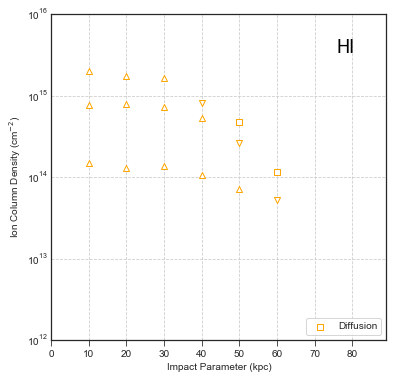

In [9]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_ylim(5e12, 1e15)
ax.set_xlim(0, 80)

pt.plot_data_scatter('HI', ax = ax, color = 'orange', orientation = 'face', model = 'anisd', label = 'Diffusion')

ax.legend(loc = 'lower right', frameon = True)
# note: why so few HI data points?

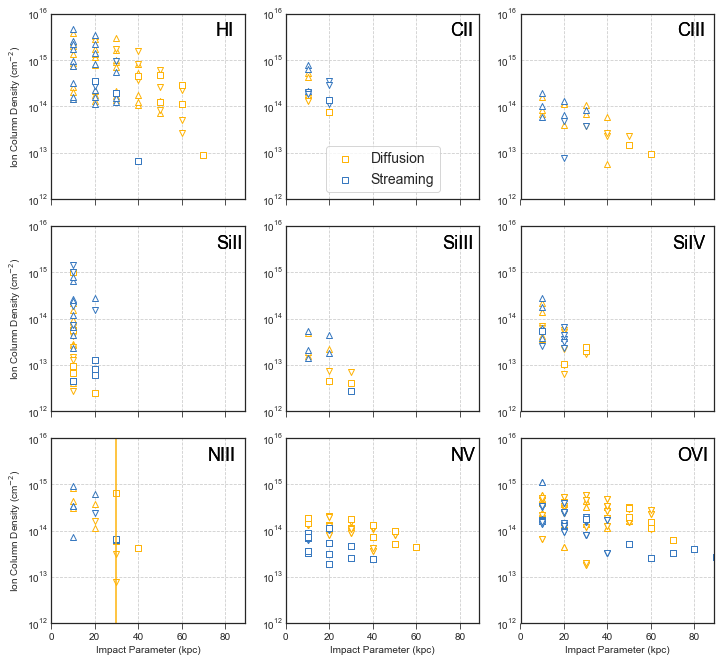

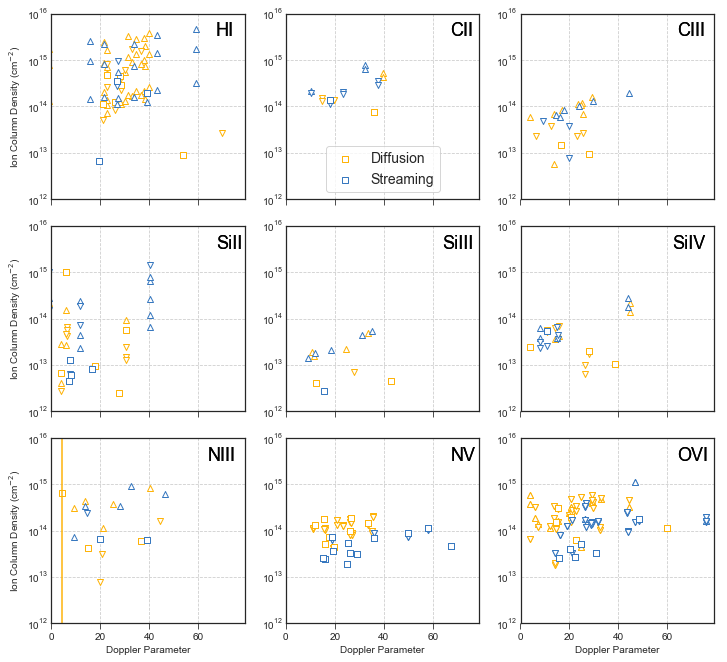

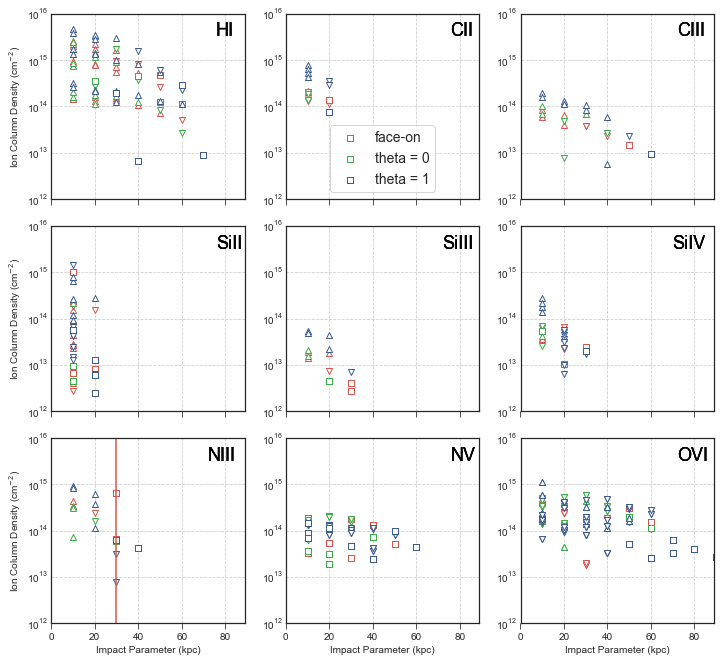

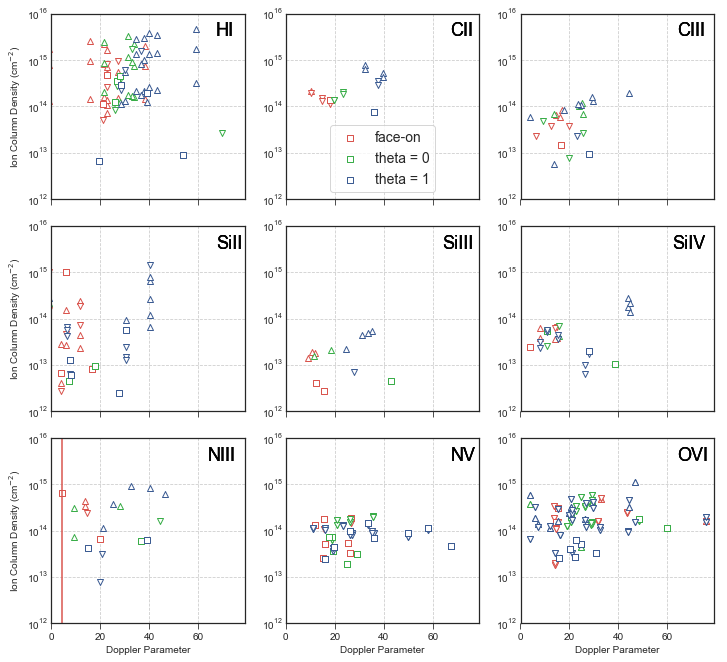

In [2]:
ion_list = ['H I', 'C II', 'C III', 'Si II', 'Si III', 'Si IV', 'N III', 'N V', 'O VI']

xfields = ['impact', 'impact', 'impact', 'bval']
yfields = ['col', 'vel', 'bval', 'col']

xfields = ['impact', 'bval']
yfields = ['col', 'col']

for compare in ['model', 'orientation']:
    for xfield, yfield in zip(xfields, yfields):
        fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(3.4*3, 3.1*3), sharex = True, sharey = False)
        figg, aax = pt.plot_multipanel_scatter(ion_list, xfield = xfield, yfield = yfield, nrows = 3, compare = compare, \
                                           fig = fig, ax = ax)

        ax[0][1].legend(loc = 'lower center', fontsize = 14, frameon = True)
        plt.savefig('../../plots/%s_%s_%s.png'%(xfield, yfield, compare), dpi = 300)




In [6]:
data['flag']

<HDF5 dataset "flag": shape (178,), type "<f8">

['OVI' 'OVI']


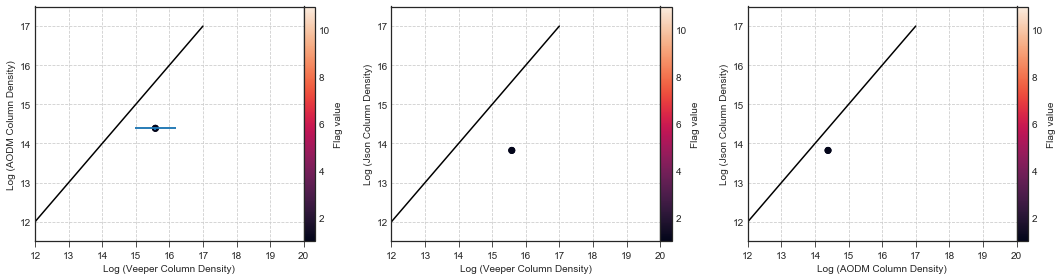

In [194]:
restwave, col, col_aodm, col_json, flag = pt.load_data(['restwave', 'col', 'col_aodm', 'col_json', 'flag_aodm'])
ion, model, orientation, impact = pt.load_data(['ion','model', 'orientation', 'impact'])
col_err, col_aodm_err, col_json_err, eqw_aodm, eqw_aodm_err, eqw_json, eqw_json_err = \
    pt.load_data(['colerr', 'col_aodm_err', 'col_json_err', 'eqw_aodm', 'eqw_aodm_err', 'eqw_json', 'eqw_json_err'])

mask = (flag == 1) & (model == 'anisd') & (orientation == 'face') & (impact  == 30) & (ion == 'NIII') 
#mask = (flag > 0) & (col_err < 1)
#mask = (impact > 40)
mask = (col_err > 0.5) & (model == 'anisd') & (orientation == 'edge_theta1.0') & (impact == 10) & (flag == 1)
#mask = (impact > 0)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#print(col_err[mask], restwave[mask])
print(ion[mask])

fig, ax = plt.subplots(ncols = 3, figsize = (15, 4))
im = ax[0].scatter(col[mask], col_aodm[mask], c = flag[mask], vmin = 1, vmax = 11)
cbar = plt.colorbar(im, ax = ax[0], pad = 0)
ax[0].errorbar(col[mask], col_aodm[mask], xerr = col_err[mask], yerr = col_aodm_err[mask], linestyle = '')
cbar.set_label('Flag value')
ax[0].plot([12, 17], [12, 17], color ='black')
ax[0].set_xlim(12, 20)
ax[0].set_ylim(11.5, 17.5)
ax[0].set_xlabel('Log (Veeper Column Density)')
ax[0].set_ylabel('Log (AODM Column Density)')

im = ax[1].scatter(col[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[1].errorbar(col[mask], col_json[mask], xerr = col_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[1], pad = 0)
cbar.set_label('Flag value')
ax[1].plot([12, 17], [12, 17], color ='black')
ax[1].set_xlim(12, 20)
ax[1].set_ylim(11.5, 17.5)
ax[1].set_xlabel('Log (Veeper Column Density)')
ax[1].set_ylabel('Log (Json Column Density)')


im = ax[2].scatter(col_aodm[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
#ax[2].errorbar(col_aodm[mask], col_json[mask], xerr = col_aodm_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[2], pad = 0)
cbar.set_label('Flag value')
ax[2].plot([12, 17], [12, 17], color ='black')
ax[2].set_xlim(12, 20)
ax[2].set_ylim(11.5, 17.5)
ax[2].set_xlabel('Log (AODM Column Density)')
ax[2].set_ylabel('Log (Json Column Density)')

fig.tight_layout()
#plt.savefig('../../plots/compare_column_flags.png', dpi = 300)

(0, 5)

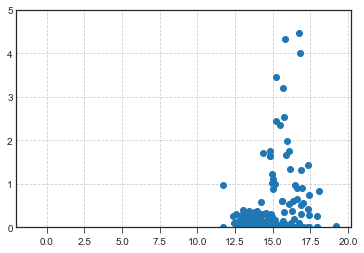

In [173]:
plt.scatter(col, col_err)
plt.ylim(0, 5)

[ 0.07   0.     0.     0.041  0.     0.041  0.     0.133  0.     1.984
  0.872 -1.     5.615  0.     0.972  0.     0.     0.     0.     0.
  0.     1.121  0.217  0.     1.425  0.042  0.     0.042  0.   ]
[0.04918307 0.02448164 0.01982525 0.03413372 0.04461256 0.03413372
 0.04461256 0.07999416 0.05719167 0.04636546 0.05670206 0.17266106
 0.07262551 0.07262551 0.07012491 0.07012491 0.07012491 0.07477584
 0.07477584 0.07477584 0.09704298 0.03849439 0.04632054 0.06033084
 0.05735979 0.05388916 0.10055783 0.05388916 0.10055783]
[        nan         nan         nan         nan  0.04354539         nan
  0.04354539  0.06476454         nan         nan         nan -1.
  0.05705854  0.05705854  0.05289422  0.05289422  0.05289422  0.05680444
  0.05680444  0.05680444  0.08466267         nan         nan  0.05569333
         nan  0.3840188   1.616037    0.3840188   1.616037  ]


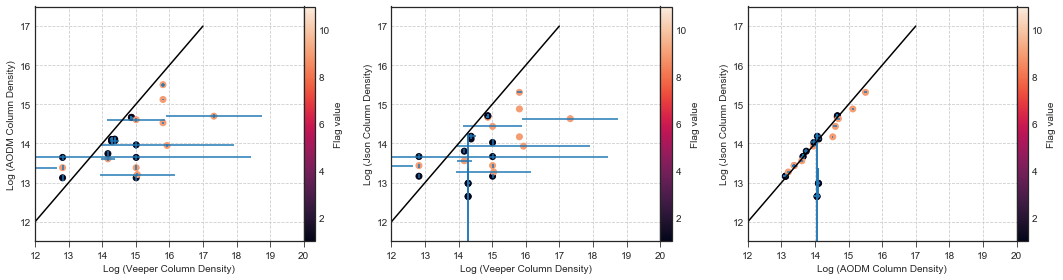

In [176]:
col, col_aodm, col_json, flag = pt.load_data(['col', 'col_aodm', 'col_json', 'flag_aodm'], fn = '../analysis/combined_spectra.h5')
ion, model, orientation, impact = pt.load_data(['ion','model', 'orientation', 'impact'], fn = '../analysis/combined_spectra.h5')
col_err, col_aodm_err, col_json_err, eqw_aodm, eqw_aodm_err, eqw_json, eqw_json_err = \
    pt.load_data(['colerr', 'col_aodm_err', 'col_json_err', 'eqw_aodm', 'eqw_aodm_err', 'eqw_json', 'eqw_json_err'], \
                    fn = '../analysis/combined_spectra.h5')
mask = (flag > 0) & (model == 'anisd') & (orientation == 'face') & (impact  == 10) 

#mask = (ion == 'OVI')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

print(col_err[mask])
print(col_aodm_err[mask])
print(col_json_err[mask])

fig, ax = plt.subplots(ncols = 3, figsize = (15, 4))
im = ax[0].scatter(col[mask], col_aodm[mask], c = flag[mask], vmin = 1, vmax = 11)
cbar = plt.colorbar(im, ax = ax[0], pad = 0)
ax[0].errorbar(col[mask], col_aodm[mask], xerr = col_err[mask], yerr = col_aodm_err[mask], linestyle = '')
cbar.set_label('Flag value')
ax[0].plot([12, 17], [12, 17], color ='black')
ax[0].set_xlim(12, 20)
ax[0].set_ylim(11.5, 17.5)
ax[0].set_xlabel('Log (Veeper Column Density)')
ax[0].set_ylabel('Log (AODM Column Density)')

im = ax[1].scatter(col[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
ax[1].errorbar(col[mask], col_json[mask], xerr = col_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[1], pad = 0)
cbar.set_label('Flag value')
ax[1].plot([12, 17], [12, 17], color ='black')
ax[1].set_xlim(12, 20)
ax[1].set_ylim(11.5, 17.5)
ax[1].set_xlabel('Log (Veeper Column Density)')
ax[1].set_ylabel('Log (Json Column Density)')


im = ax[2].scatter(col_aodm[mask], col_json[mask], c = flag[mask], vmin = 1, vmax = 11)
ax[2].errorbar(col_aodm[mask], col_json[mask], xerr = col_aodm_err[mask], yerr = col_json_err[mask], linestyle = '')
cbar = plt.colorbar(im, ax = ax[2], pad = 0)
cbar.set_label('Flag value')
ax[2].plot([12, 17], [12, 17], color ='black')
ax[2].set_xlim(12, 20)
ax[2].set_ylim(11.5, 17.5)
ax[2].set_xlabel('Log (AODM Column Density)')
ax[2].set_ylabel('Log (Json Column Density)')

fig.tight_layout()

(-0.1, 2)

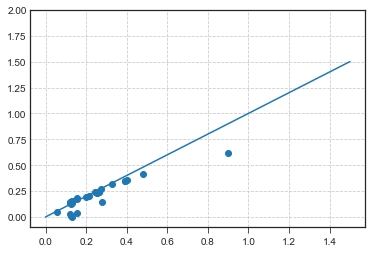

In [127]:
plt.scatter(eqw_aodm, eqw_json)
plt.plot([0, 1.5], [0, 1.5])
plt.ylim(-0.1, 2)

In [163]:
data = h5.File('../analysis/combined_spectra.h5', 'r')

In [164]:
col = data['col'].value
col_json = data['col_json'].value

In [165]:
len(col), len(col_json)

(29, 8)

In [166]:
col

array([15.81 , 15.81 , 15.81 , 14.87 , 14.87 , 14.87 , 14.87 , 14.372,
       14.372, 15.933, 15.011, -1.   , 12.819, 15.011, 11.674, 12.819,
       15.011, 11.674, 12.819, 15.011, 15.011, 15.045, 14.169, 14.169,
       17.325, 14.283, 14.283, 14.283, 14.283])

In [167]:
col_json

array([-1.     , 27.33068, 40.305  , 39.48951, 12.98125, 12.64575,
       12.98125, 12.64575])

In [153]:
a = [1, 2,3]
a[:1]

[1]